#  Week2: Data Acquisition and Preprocessing

## COVID-19 Group 2

### Aim of this notebook is to work on data gathering and pre-processing

### Steps performed:

1. Integrating data from various sources
2. Checks for Outliers
3. Checks for Incorrect data
4. Checks for Inconsistent value
5. Missing Values
6. Normalization & Standardization
7. Feature Encoding
8. Training & Test split
    


## Data Acquisition

We have used a dataset which contains daily time-series data related to COVID-19 for 50+ countries around the world. Source of the data is :
https://github.com/GoogleCloudPlatform/covid-19-open-data.

This dataset integrates comprehensive information from all the categories below:

 - Demographics
 - Economic data
 - Epidemiology
 - Geography
 - Health and Hospitalizations
 - Google Mobility and Search Trends
 - Government Response
 - Weather


### Importing required libraries
We have taken these imports from one of the Lab tutorials.

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta,date
import plotly.express as px 
import json, requests
from io import StringIO
import re
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Integrate multiple datasets

We import the already integrated dataset using an api. The dataset gets updated everyday.

In [4]:
# Load CSV data directly from the URL with pandas
data = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v2/main.csv"
)

Around 2GB data with 6 million records

In [5]:
data.shape

(6894664, 108)

Data contains records for 322 days for 248 countries. (As of 17th Nov)

In [6]:
pd.options.display.max_rows = 330
pd.options.display.max_seq_items = 330
data.groupby(data.date).country_name.nunique()

date
2020-01-01    248
2020-01-02    248
2020-01-03    248
2020-01-04    248
2020-01-05    248
2020-01-06    248
2020-01-07    248
2020-01-08    248
2020-01-09    248
2020-01-10    248
2020-01-11    248
2020-01-12    248
2020-01-13    248
2020-01-14    248
2020-01-15    248
2020-01-16    248
2020-01-17    248
2020-01-18    248
2020-01-19    248
2020-01-20    248
2020-01-21    248
2020-01-22    248
2020-01-23    248
2020-01-24    248
2020-01-25    248
2020-01-26    248
2020-01-27    248
2020-01-28    248
2020-01-29    248
2020-01-30    248
2020-01-31    248
2020-02-01    248
2020-02-02    248
2020-02-03    248
2020-02-04    248
2020-02-05    248
2020-02-06    248
2020-02-07    248
2020-02-08    248
2020-02-09    248
2020-02-10    248
2020-02-11    248
2020-02-12    248
2020-02-13    248
2020-02-14    248
2020-02-15    248
2020-02-16    248
2020-02-17    248
2020-02-18    248
2020-02-19    248
2020-02-20    248
2020-02-21    248
2020-02-22    248
2020-02-23    248
2020-02-24    248
2020-

The data has 94 numerical variables and 14 string variables.

In [7]:
len(data._get_numeric_data().columns)

94

In [9]:
data.dtypes

key                                    object
date                                   object
wikidata                               object
datacommons                            object
country_code                           object
country_name                           object
subregion1_code                        object
subregion1_name                        object
subregion2_code                        object
subregion2_name                        object
locality_code                          object
locality_name                          object
3166-1-alpha-2                         object
3166-1-alpha-3                         object
aggregation_level                       int64
new_confirmed                         float64
new_deceased                          float64
new_recovered                         float64
new_tested                            float64
total_confirmed                       float64
total_deceased                        float64
total_recovered                   

## 2. Check for out of range values

We checked all the variables  for  possible outliers.

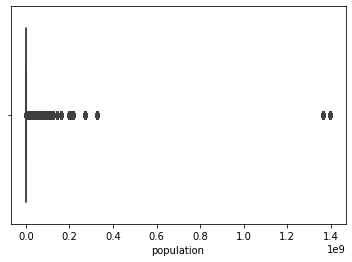

In [16]:
########################  FOR EXAMPLE OUTLIERS IN POPULATION DATA

#Plot BoxPlot
sns.boxplot(x=data['population'])

In [12]:
##########################  CHECK FOR MAX VALUE

print(max(data.population))
print(data[data.population == 1397715000].country_name.unique()) 

1397715000.0
['China']


In [20]:
##########################  CHECK FOR MIN VALUE
print(min(data.population))
print("List of Countries with missing population")
print(data[data.population == 0].country_name.unique()) 



0.0
List of Countries with missing population
['Bouvet Island' 'Heard Island and McDonald Islands']


THERE IS NO DATA AVAILABLE ONLINE ABOUT POPULATION STATS FOR ['Bouvet Island' 'Heard Island and McDonald Islands'] SO WE WILL
GO AHEAD BY REMOVING THEM FROM THE DATASET.

## 3. Checks for incorrect data

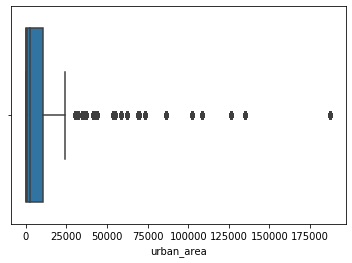

In [7]:
# Get all the unique values in the 'country_name' column
CountryName = data['country_name'].unique()

# sort them alphabetically and then take a closer look, check for multiple incosistent entries
CountryName.sort()

# convert to lower case
CountryName = data['country_name'].str.lower()

# remove trailing white spaces
CountryName = CountryName.str.strip()

# Showing outlier for values of human_development variable
sns.boxplot(x=data["human_development_index"])
sns.boxplot(x=data["urban_area"])

# Checking for out of range for Urban area variable
data = data[data['urban_area'] <= 200000]
data = data[data['human_development_index'] <= 200000]
# sns.boxplot(x=data['urban_area'])

# Brazil's HDI value for 2018 is 0.761— which put the country in the high human development category— positioning it at 79 out of 189 countries and territories. The rank is shared with Colombia. Between 1990 and 2018, Brazil's HDI value increased from 0.613 to 0.761, an increase of 24.2 percent.

## 4. Checks for inconsistent value

In [21]:
# FORMATTING CONSISTENCY CHECK (for eg  all  dates should have the SAME format)  Also Check if datatypes and data values are appropriate for future use.  
data_main = data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)

# DUPLICATE Checks 
# Create Data Frame fromt the data set 
dataFrame = pd.DataFrame(data, columns=['key', 'date', 'country_code','country_name', 'new_confirmed', 'new_deceased','new_recovered', 'new_tested', 'total_confirmed','total_deceased', 'datotal_recoveredte', 'total_tested','new_hospitalized', 'total_hospitalized', 'current_hospitalized'])

# To show all column names 
pd.set_option('display.max_columns', None)

# Finding Duplicate rows 
duplicateRows = dataFrame[dataFrame.duplicated()]
print(duplicateRows)


# Project has to provide a code here ...




Empty DataFrame
Columns: [key, date, country_code, country_name, new_confirmed, new_deceased, new_recovered, new_tested, total_confirmed, total_deceased, datotal_recoveredte, total_tested, new_hospitalized, total_hospitalized, current_hospitalized]
Index: []


## 5. Missing Values

#### Check for the entire dataset

In [22]:
df = data
totalnull_df = df.isnull().sum()
percentnull = totalnull_df/len(df)*100
display(percentnull)

key                                    0.004670
date                                   0.000000
wikidata                               7.019428
datacommons                           80.889221
country_code                           0.004670
country_name                           0.000000
subregion1_code                        1.162899
subregion1_name                        1.162899
subregion2_code                        7.229591
subregion2_name                        7.229591
locality_code                         99.850551
locality_name                         99.850551
3166-1-alpha-2                         0.014011
3166-1-alpha-3                         0.009341
aggregation_level                      0.000000
new_confirmed                         52.873498
new_deceased                          55.814076
new_recovered                         93.621531
new_tested                            95.261379
total_confirmed                       52.768750
total_deceased                        55

#### Unfortunately many of our interesting variables show a very high percentage of missing data

In [26]:
percentnull[percentnull > 50].sort_values(ascending = False)

total_ventilator                      99.957706
new_ventilator                        99.947684
hospital_beds                         99.883243
current_ventilator                    99.869174
locality_code                         99.850551
locality_name                         99.850551
clustered_population                  99.434896
smoking_prevalence                    99.318139
current_intensive_care                99.312120
current_hospitalized                  99.299980
largest_city_population               99.290118
human_capital_index                   99.271437
physicians                            99.234074
rural_area                            99.164020
urban_area                            99.164020
nurses                                99.159350
pollution_mortality_rate              99.145339
comorbidity_mortality_rate            99.145339
out_of_pocket_health_expenditure      99.131328
health_expenditure                    99.131328
adult_male_mortality_rate             99

In [ ]:
############## CHECK MISSING VALUES FOR STRINGENCY INDEX (VARIABLE OF INTEREST BUT 98% MISSING VALUES)

In [28]:
pd.options.display.max_rows = 330
pd.options.display.max_seq_items = 330
x = df[df.stringency_index.notnull()].groupby(df.date).country_name.nunique()
display(x)

# We have data availabe for around 180 countries for almost all the days

date
2020-01-01    186
2020-01-02    186
2020-01-03    186
2020-01-04    186
2020-01-05    186
2020-01-06    186
2020-01-07    186
2020-01-08    186
2020-01-09    186
2020-01-10    186
2020-01-11    186
2020-01-12    186
2020-01-13    186
2020-01-14    186
2020-01-15    186
2020-01-16    186
2020-01-17    186
2020-01-18    186
2020-01-19    186
2020-01-20    186
2020-01-21    186
2020-01-22    186
2020-01-23    186
2020-01-24    186
2020-01-25    186
2020-01-26    186
2020-01-27    186
2020-01-28    186
2020-01-29    186
2020-01-30    186
2020-01-31    185
2020-02-01    185
2020-02-02    185
2020-02-03    185
2020-02-04    185
2020-02-05    185
2020-02-06    185
2020-02-07    185
2020-02-08    185
2020-02-09    185
2020-02-10    185
2020-02-11    185
2020-02-12    185
2020-02-13    185
2020-02-14    185
2020-02-15    185
2020-02-16    185
2020-02-17    185
2020-02-18    185
2020-02-19    185
2020-02-20    185
2020-02-21    185
2020-02-22    185
2020-02-23    185
2020-02-24    185
2020-

#### Which means we have data for 180 countries for almost 321 days and yet we have 98% missing data values.This is a problem because of aggregation of  data from various sources. Data is not available for all countries at a detailed spatial resolution of states and districts.

#### We can confirm this by checking the aggregation level attribute (0: Country, 1: Province ...3:Locality)

In [31]:
df[df.stringency_index.notnull()].aggregation_level.unique()

array([0, 1], dtype=int64)

In [32]:
df[(df.stringency_index.notnull() & (df.aggregation_level != 0))].country_name.unique()

array(['United Kingdom', 'United States of America'], dtype=object)

Thus the only countries for which we have detailed data for the stringency index are the UK and the US.

Check aggregation_level for entire dataset

In [7]:
df  =  data
df.groupby(df.aggregation_level).country_name.nunique()

aggregation_level
0    247
1     59
2     20
3      6
Name: country_name, dtype: int64

#### Thus for the initial phase we have decided to stick to the country level to get a global trend. But it will be interesting to analyse the  more detailed aggregation levels in the coming iterations.

In [9]:

# MISSING DATA Evaluation
# check columns for missing values
data_main = data.columns[data.isnull().any()].tolist() 

#drop the columns or rows with all Nan values.
data_main = data.dropna(axis=1, how='all') #columns
data_main = data.dropna(axis=0, how='all') #rows

#replace the NaNs with 0
data_main.fillna(pd.Series(0, index=data.select_dtypes(exclude='category').columns),inplace=True)

# Rohil Will add the code for Missing Values here

# print(f"The dataset currently contains {len(data_main)} records, here is the Data:")

data_main

,key,date,wikidata,datacommons,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,3166-1-alpha-2,3166-1-alpha-3,aggregation_level,new_confirmed,new_deceased,new_recovered,new_tested,total_confirmed,total_deceased,total_recovered,total_tested,new_hospitalized,total_hospitalized,current_hospitalized,new_intensive_care,total_intensive_care,current_intensive_care,new_ventilator,total_ventilator,current_ventilator,population,population_male,population_female,rural_population,urban_population,largest_city_population,clustered_population,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_89,population_age_90_99,population_age_80_and_older,gdp,gdp_per_capita,human_capital_index,open_street_maps,latitude,longitude,elevation,area,rural_area,urban_area,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds,nurses,physicians,health_expenditure,out_of_pocket_health_expenditure,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index,noaa_station,noaa_distance,average_temperature,minimum_temperature,maximum_temperature,rainfall,snowfall,dew_point,relative_humidity
322,AE,2020-01-01,Q878,country/ARE,AE,United Arab Emirates,0,0,0,0,0,0,AE,ARE,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9770529.0,6766808.0,3003721.0,1290785.0,8479744.0,2833079.0,5914068.0,135.60911,0.863,870683.0,786876.0,1841983.0,2722996.0,1907265.0,889205.0,225625.0,58028.0,9915.0,2478.0,12394.0,4.211423e+11,43103.0,0.659,307763.0,24.4,54.3,0.0,83600.0,70575.0,8568.0,77.814,28.9,16.3,6.5,69.555,44.863,54.7,16.8,0.0,5.7271,2.5278,1357.017456,256.034485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.121610e+10,16.303110,21.261111,16.216667,26.083333,0.0000,0.0,11.555556,54.350613
323,AE,2020-01-02,Q878,country/ARE,AE,United Arab Emirates,0,0,0,0,0,0,AE,ARE,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9770529.0,6766808.0,3003721.0,1290785.0,8479744.0,2833079.0,5914068.0,135.60911,0.863,870683.0,786876.0,1841983.0,2722996.0,1907265.0,889205.0,225625.0,58028.0,9915.0,2478.0,12394.0,4.211423e+11,43103.0,0.659,307763.0,24.4,54.3,0.0,83600.0,70575.0,8568.0,77.814,28.9,16.3,6.5,69.555,44.863,54.7,16.8,0.0,5.7271,2.5278,1357.017456,256.034485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.121610e+10,16.303110,21.983333,17.461111,26.222222,0.0000,0.0,13.855556,61.378914
324,AE,2020-01-03,Q878,country/ARE,AE,United Arab Emirates,0,0,0,0,0,0,AE,ARE,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9770529.0,6766808.0,3003721.0,1290785.0,8479744.0,2833079.0,5914068.0,135.60911,0.863,870683.0,786876.0,1841983.0,2722996.0,1907265.0,889205.0,225625.0,58028.0,9915.0,2478.0,12394.0,4.211423e+11,43103.0,0.659,307763.0,24.4,54.3,0.0,83600.0,70575.0,8568.0,77.814,28.9,16.3,6.5,69.555,44.863,54.7,16.8,0.0,5.7271,2.5278,1357.017456,256.034485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.121610e+10,16.303110,22.688889,17.161111,28.294444,0.0000,0.0,12.833333,54.325510
325,AE,2020-01-04,Q878,country/ARE,AE,United Arab Emir

## 6. Normalization & Standardization

In [89]:
# Standardization Goal : we are going to have a mean of 0 and a standard deviation of 1 in our dataset.

# Standardization
# ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables.
# ddof = Delta Degrees of Freedom
# Variance Before
# z = (x.values - np.mean(x.values)) / np.std(x.values) 
# x is a dataframe with all numerical indices
# If we want to retain the values in a dataframe, then we can simply remove .values in front of it.

# Check Variance Before
data.var(ddof=0)

ss = StandardScaler()


#drop the columns or rows with all Nan values.
data_main = data.dropna(axis=1, how='all') #columns
data_main = data.dropna(axis=0, how='all') #rows

#replace the NaNs with 0
data_main.fillna(pd.Series(0, index=data.select_dtypes(exclude='category').columns),inplace=True)


# Applied StandardScaler on all the numerical columns
data_main.iloc[:,4:-1] = ss.fit_transform(data_main.iloc[:,4:-1])

#print(data)

# check the variance of the dataset
data_main.var(ddof=0)

# Output : You will see the variance converging to 1.0000 which is our goal in standarization


The dataset currently contains 21412 records, here is the Data:


,date,country_name,total_confirmed,total_deceased,total_recovered,population,population_male,population_female,rural_population,urban_population,...,latitude,longitude,hospital_beds,nurses,physicians,health_expenditure,emergency_investment_in_healthcare,stringency_index,average_temperature,relative_humidity
0,2020-11-14,Andorra,5616.0,75.0,0.0,77142.0,58625.0,55581.0,9269.0,67873.0,...,42.558333,1.555278,0.0,4.0128,3.3333,4040.786621,0.0,59.26,10.972222,81.676879
1,2020-11-14,United Arab Emirates,146735.0,523.0,0.0,9770529.0,6766808.0,3003721.0,1290785.0,8479744.0,...,24.400000,54.300000,0.0,5.7271,2.5278,1357.017456,0.0,47.22,28.027778,61.433807
2,2020-11-14,Afghanistan,42969.0,1595.0,0.0,38041754.0,19529725.0,18512029.0,28244481.0,9797273.0,...,34.000000,66.000000,0.5,0.1755,0.2782,67.122650,0.0,5.56,9.518519,21.080084
3,2020-11-14,Afghanistan,2704.0,106.0,1580.0,1325700.0,0.0,0.0,0.0,0.0,...,36.700000,67.116667,0.0,0.0000,0.0000,0.000000,0.0,0.00,10.907407,53.391762
4,2020-11-14,Afghanistan,926.0,12.0,707.0,492400.0,0.0,0.0,0.0,0.0,...,34.750000,67.250000,0.0,0.0000,0.0000,0.000000,0.0,0.00,9.675926,35.460345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21407,2020-11-14,South Africa,3803.0,0.0,0.0,258176.0,0.0,0.0,0.0,0.0,...,-34.500000,20.000000,0.0,0.0000,0.0000,0.000000,0.0,0.00,14.660494,58.922860
21408,2020-11-14,South Africa,11851.0,0.0,0.0,574265.0,0.0,0.0,0.0,0.0,...,-33.750000,22.000000,0.0,0.0000,0.0000,0.000000,0.0,0.00,15.839506,57.888026
21409,2020-11-14,South Africa,1043.0,0.0,0.0,71011.0,0.0,0.0,0.0,0.0,...,-32.666667,22.250000,0.0,0.0000,0.0000,0.000000,0.0,0.00,14.895062,51.189015
21410,2020-11-14,Zambia,17036.0,350.0,0.0,17861030.0,8843212.0,9017818.0,9989317.0,7871713.0,...,-14.000000,28.000000,0.0,1.3376,1.1867,67.648666,0.0,41.67,27.666667,34.763772


In [ ]:
# NORMALIZATION - Convert numerical data to be in the range 0  to 1
norm = Normalizer()

data_main = data.columns[data.isnull().any()].tolist() 

#drop the columns or rows with all Nan values.
data_main = data.dropna(axis=1, how='all') #columns
data_main = data.dropna(axis=0, how='all') #rows

#replace the NaNs with 0
data_main.fillna(pd.Series(0, index=data.select_dtypes(exclude='category').columns),inplace=True)

data_main.iloc[:,4:-1] = norm.fit_transform(data_main.iloc[:,4:-1])

data_main

## 7. Feature Encoding

In [ ]:
# DATA DISCRETIZATION / SMOOTHING - Convert CONTINUOUS DATA TO CATEGORICAL DATA

# Feature Encoding
# CREATE  NEW  VARIABLE - For  eg  date can be divided into 3 separate variables(D/M/Y))
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day
data

bins = [0, 1000, 5000, 10000]
labels = ["Not Critical","Worrying","Critical"]
data['range'] = pd.cut(data['total_confirmed'], bins=bins, labels=labels)
data

## 8.a. Training & Test split : Sampling methods 

In [ ]:
# Pareto Principle : 80-20 Rule
# 80% Training and 20% Testing


# Data Sampling
# here you get 75% of the rows
# If you don't specify the random_state in your code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.
# if a fixed value is assigned like random_state = 0 or 1 or 42 then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.
#df.sample(frac=0.5, replace=True, random_state=1)
data_main.sample(frac=0.75, random_state=1)



# Variable X to store the independent features.
# Using the drop() function to include all the features, leaving out the dependent or the target variables
#X = df.drop(['total_confirmed', 'D'], axis = 1) 
# Independent Variable
X = data_main.drop(['total_confirmed'], axis = 1) 
X.head()
# To find number of observations and features (#No of Observations, #No of Features)
X.shape

#Target Variable (Dependent Variable)
y = data_main['total_confirmed']
#y.head(1000)
y.shape

# Train-Test Split
# 0.2 means that test is 20% , so it is 80-20 split 
# test_train_split splits the arrays or matrices into train and test subsets in a random way. Each time we run the code without random_state, we will get a different result.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

##  Final dataset obtained by grouping data at a country level

In [26]:
df1 = data[['date','country_name','average_temperature', 'stringency_index']]
df1 = df1.groupby(['date','country_name']).mean().dropna()

In [36]:
df1.index

MultiIndex([('2020-01-01',    'Afghanistan'),
            ('2020-01-01',        'Albania'),
            ('2020-01-01',        'Algeria'),
            ('2020-01-01',        'Andorra'),
            ('2020-01-01',         'Angola'),
            ('2020-01-01',       'Anguilla'),
            ('2020-01-01',      'Argentina'),
            ('2020-01-01',          'Aruba'),
            ('2020-01-01',      'Australia'),
            ('2020-01-01',        'Austria'),
            ...
            ('2020-11-14', 'United Kingdom'),
            ('2020-11-14',        'Vanuatu'),
            ('2020-11-14',      'Venezuela'),
            ('2020-11-14',        'Vietnam'),
            ('2020-11-14',         'Zambia'),
            ('2020-11-15',       'Colombia'),
            ('2020-11-15',           'Cuba'),
            ('2020-11-15',         'France'),
            ('2020-11-15',         'Mexico'),
            ('2020-11-15',      'Venezuela')],
           names=['date', 'country_name'], length=54430)

In [32]:
df2 = data[['key', 'date', 'wikidata', 'datacommons', 'country_code',
       'country_name', 'new_confirmed', 'new_deceased',
       'new_recovered', 'new_tested', 'total_confirmed', 'total_deceased',
       'total_recovered', 'total_tested', 'new_hospitalized',
       'total_hospitalized', 'current_hospitalized', 'new_intensive_care',
       'total_intensive_care', 'current_intensive_care', 'new_ventilator',
       'total_ventilator', 'current_ventilator', 'population',
       'population_male', 'population_female', 'rural_population',
       'urban_population', 'largest_city_population', 'clustered_population',
       'population_density', 'human_development_index', 'population_age_00_09',
       'population_age_10_19', 'population_age_20_29', 'population_age_30_39',
       'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
       'population_age_70_79', 'population_age_80_89', 'population_age_90_99',
       'population_age_80_and_older', 'gdp', 'gdp_per_capita',
       'human_capital_index',  'rural_area', 'urban_area', 'life_expectancy',
       'smoking_prevalence', 'diabetes_prevalence', 
       'hospital_beds', 'nurses', 'physicians', 'health_expenditure',
       'out_of_pocket_health_expenditure', 'mobility_retail_and_recreation',
       'mobility_grocery_and_pharmacy', 'mobility_parks',
       'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential', 'school_closing', 'workplace_closing',
       'cancel_public_events', 'restrictions_on_gatherings',
       'public_transport_closing', 'stay_at_home_requirements',
       'restrictions_on_internal_movement', 'international_travel_controls',
       'income_support', 'debt_relief', 'fiscal_measures',
       'international_support', 'public_information_campaigns',
       'testing_policy', 'contact_tracing',
       'emergency_investment_in_healthcare', 'investment_in_vaccines']]
df2 = df2.groupby(['date','country_name']).sum().dropna()

In [33]:
df2.index

MultiIndex([('2020-01-01',         'Afghanistan'),
            ('2020-01-01',             'Albania'),
            ('2020-01-01',             'Algeria'),
            ('2020-01-01',      'American Samoa'),
            ('2020-01-01',             'Andorra'),
            ('2020-01-01',              'Angola'),
            ('2020-01-01',            'Anguilla'),
            ('2020-01-01',          'Antarctica'),
            ('2020-01-01', 'Antigua and Barbuda'),
            ('2020-01-01',           'Argentina'),
            ...
            ('2020-11-17',          'Uzbekistan'),
            ('2020-11-17',             'Vanuatu'),
            ('2020-11-17',        'Vatican City'),
            ('2020-11-17',           'Venezuela'),
            ('2020-11-17',             'Vietnam'),
            ('2020-11-17',   'Wallis and Futuna'),
            ('2020-11-17',      'Western Sahara'),
            ('2020-11-17',               'Yemen'),
            ('2020-11-17',              'Zambia'),
            ('2

In [40]:
df2 = pd.concat([df1, df2], axis=1, join_axes=[df2.index])

In [41]:
df2 = df2.reset_index()
df2.shape

(79856, 77)

In [30]:
df2.isnull().sum()

date                                      0
country_name                              0
average_temperature                   25426
stringency_index                      25426
new_confirmed                             0
                                      ...  
public_information_campaigns              0
testing_policy                            0
contact_tracing                           0
emergency_investment_in_healthcare        0
investment_in_vaccines                    0
Length: 77, dtype: int64

In [42]:
len(df2[df2.average_temperature.notnull()].country_name.unique())

178

In [43]:
len(df2[df2.average_temperature.isnull()].country_name.unique())

248

## Problems

1. #### Missing/Insufficient data at higher levels of aggregation since the data was obtained from multiple sources. 
2. #### Problems of making relation between variables
3. #### Checking calculation of Stringency index aspect
4. #### For some countries there were no population data (small countries)



